<h2 style= "background-color: #111; 
            padding: 18px; 
            font: bold 26px tahoma;
            text-align:center; 
            color:gold;
            border: 3px solid red;
            border-radius: 5px;">   
   📊 HR Analytics: Unveiling Patterns in Data Scientist Job Transitions

</h2>

## **Context and Content**
\
**A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.**

**This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.**

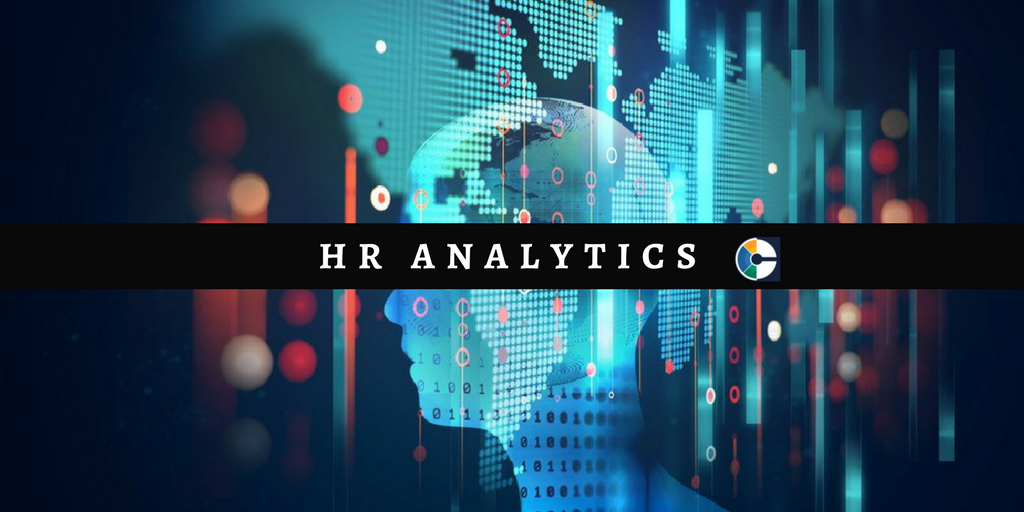

## **Features**

- enrollee_id : Unique ID for candidate.
- city: City code.
- city_ development _index : Developement index of the city (scaled).
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- last_new_job: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

## Libraries Imported

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


### Importing the Dataset

In [6]:
df=pd.read_csv(r"C:\Users\vijit\Downloads\archive (5)\aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
df.head(5) # Here the head repersents first 5 rows in a column 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [9]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Data Visualization

## Descrides about gender,major discipline,companytype,company_size,enrolled university,education level

<Axes: xlabel='gender', ylabel='count'>

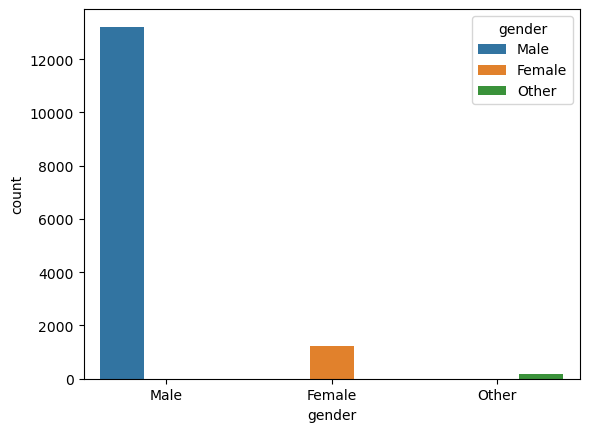

In [10]:
sns.countplot(x=df['gender'], hue=df['gender'])

<Axes: xlabel='relevent_experience', ylabel='count'>

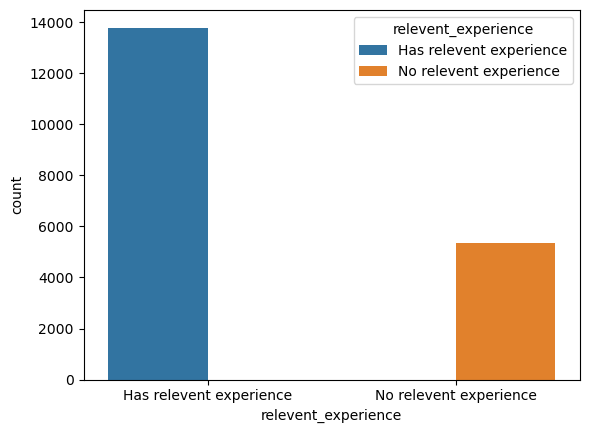

In [11]:
sns.countplot(x=df['relevent_experience'], hue=df['relevent_experience'])

<Axes: xlabel='enrolled_university', ylabel='count'>

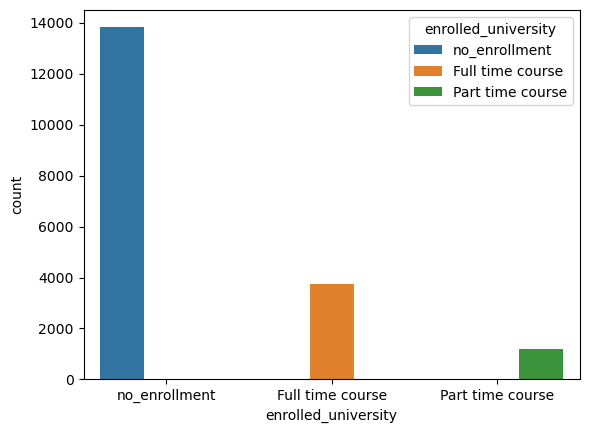

In [12]:
sns.countplot(x=df['enrolled_university'], hue=df['enrolled_university'])

<Axes: xlabel='education_level', ylabel='count'>

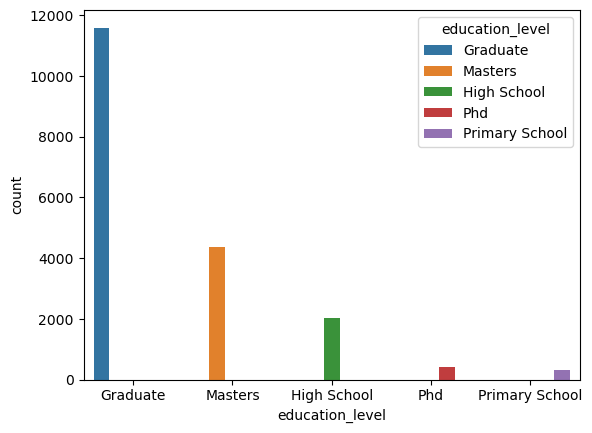

In [13]:
sns.countplot(x=df['education_level'], hue=df['education_level'])

<Axes: xlabel='major_discipline', ylabel='count'>

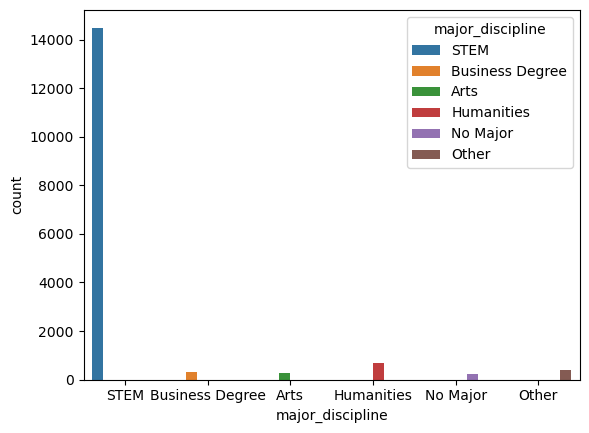

In [14]:
sns.countplot(x=df['major_discipline'], hue=df['major_discipline'])

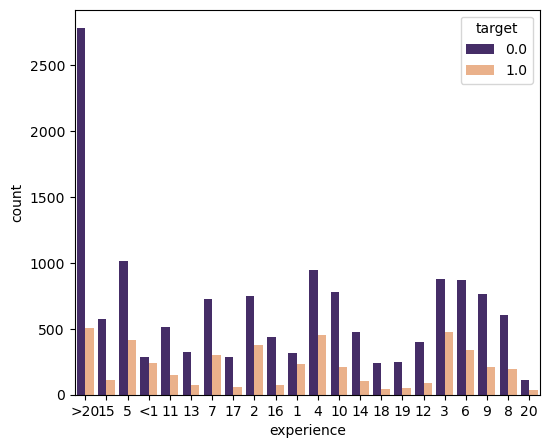

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x="experience",hue="target",data=df,palette=['#432371',"#FAAE7B"])
plt.show()


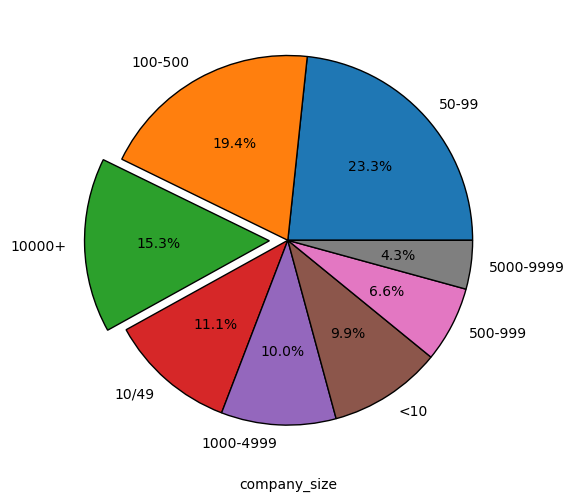

In [16]:
index=df['company_size'].value_counts().index
values=df['company_size'].value_counts()
plt.figure(figsize=(7,6))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"},explode=[0,0,0.1,0,0,0,0,0])
plt.show()

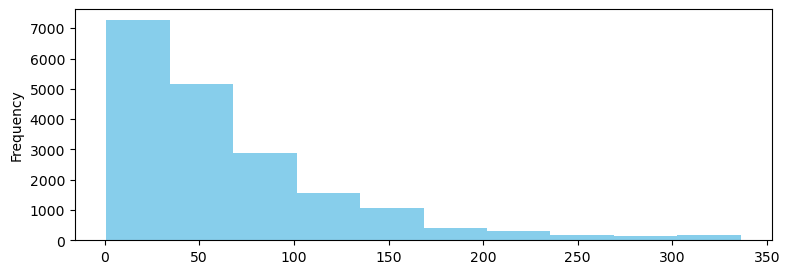

In [17]:
plt.figure(figsize=(9,3))
plt.hist(df["training_hours"], color="skyblue")
plt.ylabel("Frequency")
plt.show()


## According To Given Dataset Look At Target Variable is Imbalanced

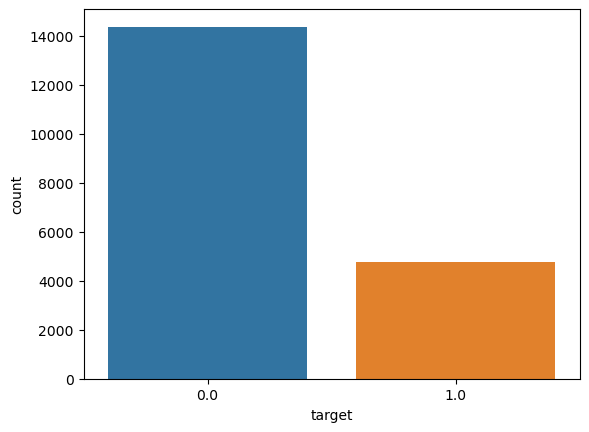

In [18]:
sns.countplot(x='target',data=df)
plt.show()

In [19]:
df["target"].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

## Data Pre-Processing

In [20]:
df['experience'].isna().sum()

65

In [21]:
#Filling experience

df['experience'].mode()
df['experience'].fillna(value='>20',inplace=True)

In [22]:
# Assuming 'df' is your entire dataframe

# Function to clean the experience column based on value_counts()
def clean_experience(exp):
    if exp == '>20':
        return 21  # Converting '>20' to 21
    elif exp == '<1':
        return 0  # Converting '<1' to 0
    else:
        return int(exp)  # Convert all other values directly to integers

# Apply the function to the 'experience' column in the entire dataframe
df['experience'] = df['experience'].apply(clean_experience)

# Display the cleaned dataframe


In [23]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0


In [24]:
df['last_new_job'].isna().sum()

423

In [25]:
df['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [26]:
df['last_new_job'].mode()
df['last_new_job'].fillna(value='>20',inplace=True)

In [27]:
df['last_new_job'].dtype

dtype('O')

In [28]:
# Function to clean the 'last_new_job' column based on value_counts()
def clean_last_new_job(job):
    if job == '>4':
        return 5  # Converting '>4' to 5
    elif job == 'never':
        return 0  # Converting 'never' to 0
    else:
        try:
            return int(job)  # Convert all other values directly to integers
        except ValueError:
            return None  # Handle unexpected values gracefully (optional)

# Apply the function to the 'last_new_job' column in the entire dataframe
df['last_new_job'] = df['last_new_job'].apply(clean_last_new_job)

# Display the cleaned dataframe
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4.0,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2.0,97,0.0


In [29]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4.0,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2.0,97,0.0


In [30]:
df['last_new_job']

0        1.0
1        5.0
2        0.0
3        0.0
4        4.0
        ... 
19153    1.0
19154    4.0
19155    4.0
19156    2.0
19157    1.0
Name: last_new_job, Length: 19158, dtype: float64

In [31]:
df['last_new_job'].dtype

dtype('float64')

In [32]:
df['last_new_job'].value_counts()

last_new_job
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: count, dtype: int64

In [33]:
df['last_new_job'].isna().sum()

423

In [34]:
# Apply the function to the 'last_new_job' column
df['last_new_job'] = df['last_new_job'].apply(clean_last_new_job)

# Drop rows with NaN values in 'last_new_job' column
df = df.dropna(subset=['last_new_job'])

# Convert the 'last_new_job' column to integer
df['last_new_job'] = df['last_new_job'].astype('int')


In [35]:
df.shape

(18735, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18735 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18735 non-null  int64  
 1   city                    18735 non-null  object 
 2   city_development_index  18735 non-null  float64
 3   gender                  14576 non-null  object 
 4   relevent_experience     18735 non-null  object 
 5   enrolled_university     18382 non-null  object 
 6   education_level         18312 non-null  object 
 7   major_discipline        16037 non-null  object 
 8   experience              18735 non-null  int64  
 9   company_size            13003 non-null  object 
 10  company_type            12836 non-null  object 
 11  last_new_job            18735 non-null  int32  
 12  training_hours          18735 non-null  int64  
 13  target                  18735 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(8

In [37]:
df['last_new_job'].isna().sum()

0

In [38]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0


In [41]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
print(df['gender'].value_counts())

gender
Male      17312
Female     1232
Other       191
Name: count, dtype: int64


In [45]:
df = df[df['gender'].isin(['Male', 'Female'])]
print(df['gender'].value_counts())

gender
Male      17312
Female     1232
Name: count, dtype: int64


In [48]:
df['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [49]:
df['enrolled_university'].fillna(value='no_enrollment',inplace=True)

In [51]:
df['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [52]:
df['education_level'].fillna(value='Graduate',inplace=True)

In [53]:
df['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [54]:
df['major_discipline'].fillna(value='STEM',inplace=True)

In [55]:
#Filling company size
df['company_size'].mode()
df['company_size'].fillna(value='50-99',inplace=True)

In [56]:
df['company_type'].mode()
df['company_type'].fillna(value='Pvt Ltd',inplace=True)

In [57]:

# Define a function to convert company size to a numerical range
def convert_company_size(size):
    if size == '<10':
        return 5  # Using a representative value for '<10'
    elif size == '10/49':
        return 29.5  # Midpoint for '10/49'
    elif size == '50-99':
        return 74.5  # Midpoint for '50-99'
    elif size == '100-500':
        return 300  # Midpoint for '100-500'
    elif size == '500-999':
        return 750  # Midpoint for '500-999'
    elif size == '1000-4999':
        return 3000  # Midpoint for '1000-4999'
    elif size == '5000-9999':
        return 7500  # Midpoint for '5000-9999'
    elif size == '10000+':
        return 10000  # Using a representative value for '10000+'
    else:
        return None  # For any unexpected categories

# Apply the function to create a new column with numerical values
df['company_size'] = df['company_size'].apply(convert_company_size)

# Display the DataFrame
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,74.5,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,74.5,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,74.5,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,74.5,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,74.5,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,74.5,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,74.5,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,750.0,Pvt Ltd,2,97,0.0


In [58]:
df['city'].value_counts()

city
city_103    4232
city_21     2577
city_16     1505
city_114    1298
city_160     827
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [59]:
df['city'] = df['city'].str.split("_",expand=True)[1].astype('int64')

In [60]:
df['target']=df['target'].astype('int64')

In [61]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,74.5,Pvt Ltd,1,36,1
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,74.5,Pvt Ltd,5,47,0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,74.5,Pvt Ltd,0,83,0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,74.5,Pvt Ltd,0,52,1
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,74.5,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,74.5,Pvt Ltd,1,42,1
19154,31398,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,52,1
19155,24576,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,74.5,Pvt Ltd,4,44,0
19156,5756,65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,750.0,Pvt Ltd,2,97,0


## Note That Don't Forgot that data is imbalanced**

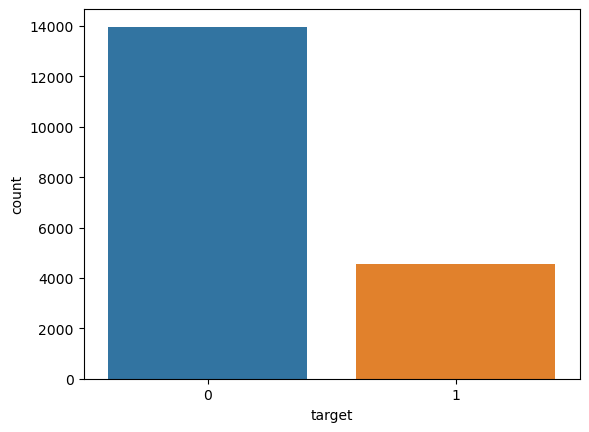

In [62]:
sns.countplot(x='target',data=df)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [64]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,74.5,Pvt Ltd,1,36,1
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,74.5,Pvt Ltd,5,47,0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,74.5,Pvt Ltd,0,83,0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,74.5,Pvt Ltd,0,52,1
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,74.5,Funded Startup,4,8,0


In [65]:
df.dtypes


enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size              float64
company_type               object
last_new_job                int32
training_hours              int64
target                      int64
dtype: object

In [66]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [67]:

ordinal_encoder = OrdinalEncoder()

df['gender'] = ordinal_encoder.fit_transform(df[['gender']])
df['relevent_experience'] = ordinal_encoder.fit_transform(df[['relevent_experience']])
df['relevent_experience'] = ordinal_encoder.fit_transform(df[['relevent_experience']])
df['enrolled_university'] = ordinal_encoder.fit_transform(df[['enrolled_university']])
df['education_level'] = ordinal_encoder.fit_transform(df[['education_level']])
df['major_discipline'] = ordinal_encoder.fit_transform(df[['major_discipline']])
df['company_type'] = ordinal_encoder.fit_transform(df[['company_type']])

In [68]:
df.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                    float64
relevent_experience       float64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                  int64
company_size              float64
company_type              float64
last_new_job                int32
training_hours              int64
target                      int64
dtype: object

In [69]:
Nominal=["gender","enrolled_university","education_level","major_discipline","company_type"]

In [70]:
Nominal_transform=Pipeline([("Onehotencoding",OneHotEncoder(drop="first",handle_unknown='ignore'))])

In [71]:
Nominal_transform

Pipeline(steps=[('Onehotencoding',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [72]:
preprocess=ColumnTransformer([("Nominal Transform",Nominal_transform,Nominal)])
preprocess

ColumnTransformer(transformers=[('Nominal Transform',
                                 Pipeline(steps=[('Onehotencoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['gender', 'enrolled_university',
                                  'education_level', 'major_discipline',
                                  'company_type'])])

In [73]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

# Assuming df is your dataset after encoding as per previous steps

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  
y = df['target']               

# Split data into training and test sets (optional, but recommended before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=23)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Checking the balance of classes after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())



Before SMOTE: target
0    11205
1     3630
Name: count, dtype: int64
After SMOTE: target
0    11205
1    11205
Name: count, dtype: int64


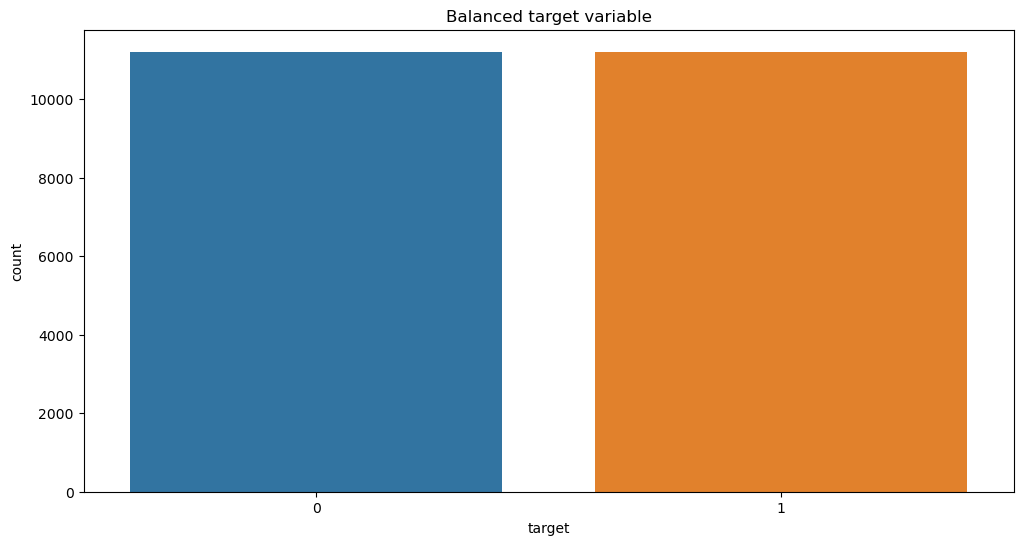

In [74]:
plt.figure(figsize=(12,6))
plt.title("Balanced target variable")
ax = sns.countplot(x=y_train_res)

## **Model Building**

In [75]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## **Logistic Regression**

In [76]:
model=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",LogisticRegression())])

In [77]:
model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm', LogisticRegression())])

In [78]:

start_time_fit = time.time()
model.fit(X_train, y_train)
end_time_fit = time.time()

# Measure the time for the predict operation (inference time)
start_time_predict = time.time()
y_pred = model.predict(X_test)
end_time_predict = time.time()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print time taken
time_taken_fit = end_time_fit - start_time_fit
time_taken_predict = end_time_predict - start_time_predict

print(f"Time taken to fit the model: {time_taken_fit:.4f} seconds")
print(f"Time taken to make predictions: {time_taken_predict:.4f} seconds")


              precision    recall  f1-score   support

           0       0.75      1.00      0.85      2766
           1       0.00      0.00      0.00       943

    accuracy                           0.75      3709
   macro avg       0.37      0.50      0.43      3709
weighted avg       0.56      0.75      0.64      3709

Time taken to fit the model: 0.1455 seconds
Time taken to make predictions: 0.0080 seconds


## Random Forest

In [79]:
model1=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",RandomForestClassifier())])
model1

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm', RandomForestClassifier())])

In [80]:

start_time_fit = time.time()
model1.fit(X_train, y_train)
end_time_fit = time.time()

# Measure the time for the predict operation (inference time)
start_time_predict = time.time()
y_pred = model1.predict(X_test)
end_time_predict = time.time()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print time taken
time_taken_fit = end_time_fit - start_time_fit
time_taken_predict = end_time_predict - start_time_predict

print(f"Time taken to fit the model: {time_taken_fit:.4f} seconds")
print(f"Time taken to make predictions: {time_taken_predict:.4f} seconds")


              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2766
           1       0.29      0.01      0.01       943

    accuracy                           0.74      3709
   macro avg       0.52      0.50      0.43      3709
weighted avg       0.63      0.74      0.64      3709

Time taken to fit the model: 3.1455 seconds
Time taken to make predictions: 0.0648 seconds


## Naive Bayes

In [81]:
model2=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",MultinomialNB())])
model2

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm', MultinomialNB())])

In [82]:
model2=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",MultinomialNB())])

start_time_fit = time.time()
model2.fit(X_train, y_train)
end_time_fit = time.time()

# Measure the time for the predict operation (inference time)
start_time_predict = time.time()
y_pred = model2.predict(X_test)
end_time_predict = time.time()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print time taken
time_taken_fit = end_time_fit - start_time_fit
time_taken_predict = end_time_predict - start_time_predict

print(f"Time taken to fit the model: {time_taken_fit:.4f} seconds")
print(f"Time taken to make predictions: {time_taken_predict:.4f} seconds")


              precision    recall  f1-score   support

           0       0.75      1.00      0.85      2766
           1       0.00      0.00      0.00       943

    accuracy                           0.75      3709
   macro avg       0.37      0.50      0.43      3709
weighted avg       0.56      0.75      0.64      3709

Time taken to fit the model: 0.0302 seconds
Time taken to make predictions: 0.0092 seconds


## KNN Classifier

In [83]:
model3=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",KNeighborsClassifier())])
model3



Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm', KNeighborsClassifier())])

In [84]:
model3=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",KNeighborsClassifier())])

start_time_fit = time.time()
model3.fit(X_train, y_train)
end_time_fit = time.time()

# Measure the time for the predict operation (inference time)
start_time_predict = time.time()
y_pred = model3.predict(X_test)
end_time_predict = time.time()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print time taken
time_taken_fit = end_time_fit - start_time_fit
time_taken_predict = end_time_predict - start_time_predict

print(f"Time taken to fit the model: {time_taken_fit:.4f} seconds")
print(f"Time taken to make predictions: {time_taken_predict:.4f} seconds")


              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2766
           1       0.39      0.24      0.30       943

    accuracy                           0.71      3709
   macro avg       0.58      0.56      0.56      3709
weighted avg       0.67      0.71      0.69      3709

Time taken to fit the model: 0.0278 seconds
Time taken to make predictions: 4.8433 seconds


## XG-Boost

In [85]:
xgb=XGBClassifier()
model4=Pipeline([("Data Preprocessing",preprocess),
                ("Algorithm",XGBClassifier())])
model4


Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [86]:

start_time_fit = time.time()
model4.fit(X_train, y_train)
end_time_fit = time.time()

# Measure the time for the predict operation (inference time)
start_time_predict = time.time()
y_pred = model4.predict(X_test)
end_time_predict = time.time()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print time taken
time_taken_fit = end_time_fit - start_time_fit
time_taken_predict = end_time_predict - start_time_predict

print(f"Time taken to fit the model: {time_taken_fit:.4f} seconds")
print(f"Time taken to make predictions: {time_taken_predict:.4f} seconds")


              precision    recall  f1-score   support

           0       0.75      0.99      0.85      2766
           1       0.33      0.01      0.02       943

    accuracy                           0.74      3709
   macro avg       0.54      0.50      0.44      3709
weighted avg       0.64      0.74      0.64      3709

Time taken to fit the model: 0.8498 seconds
Time taken to make predictions: 0.0200 seconds


In [91]:
Accuracy_table=pd.DataFrame({"Algorithm":["XGBClassifier","KNeighborsClassifier","Naive Bayes","RandomForestClassifier","Logistic Regression"],
                             "Accuracy":[0.76,0.75,0.75,0.74,0.75],
                              })
                            
Accuracy_table

,Algorithm,Accuracy
0,XGBClassifier,0.76
1,KNeighborsClassifier,0.75
2,Naive Bayes,0.75
3,RandomForestClassifier,0.74
4,Logistic Regression,0.75


In [88]:
"XGBClassifier","KNeighborsClassifier","Naive Bayes","RandomForestClassifier"

('XGBClassifier',
 'KNeighborsClassifier',
 'Naive Bayes',
 'RandomForestClassifier')

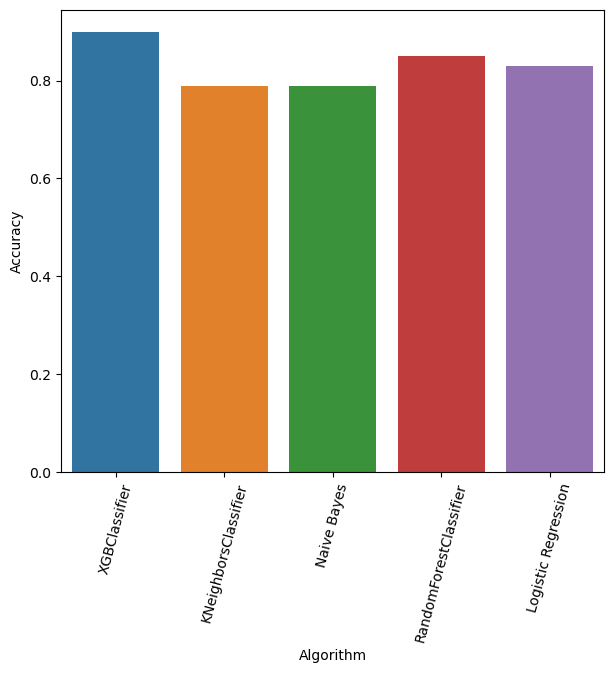

In [89]:
plt.figure(figsize=(7, 6))
sns.barplot(x=Accuracy_table["Algorithm"],y=Accuracy_table["Accuracy"])
plt.xticks(rotation=75)
plt.show()       

In [90]:
#Pickling file
import pickle
pickle.dump(model4,open("Hr_Analysis.pkl","wb"))
test=pickle.load(open("Hr_Analysis.pkl","rb"))
test

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Nominal Transform',
                                                  Pipeline(steps=[('Onehotencoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('Algorithm',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## The Final Output of an Model Deployment

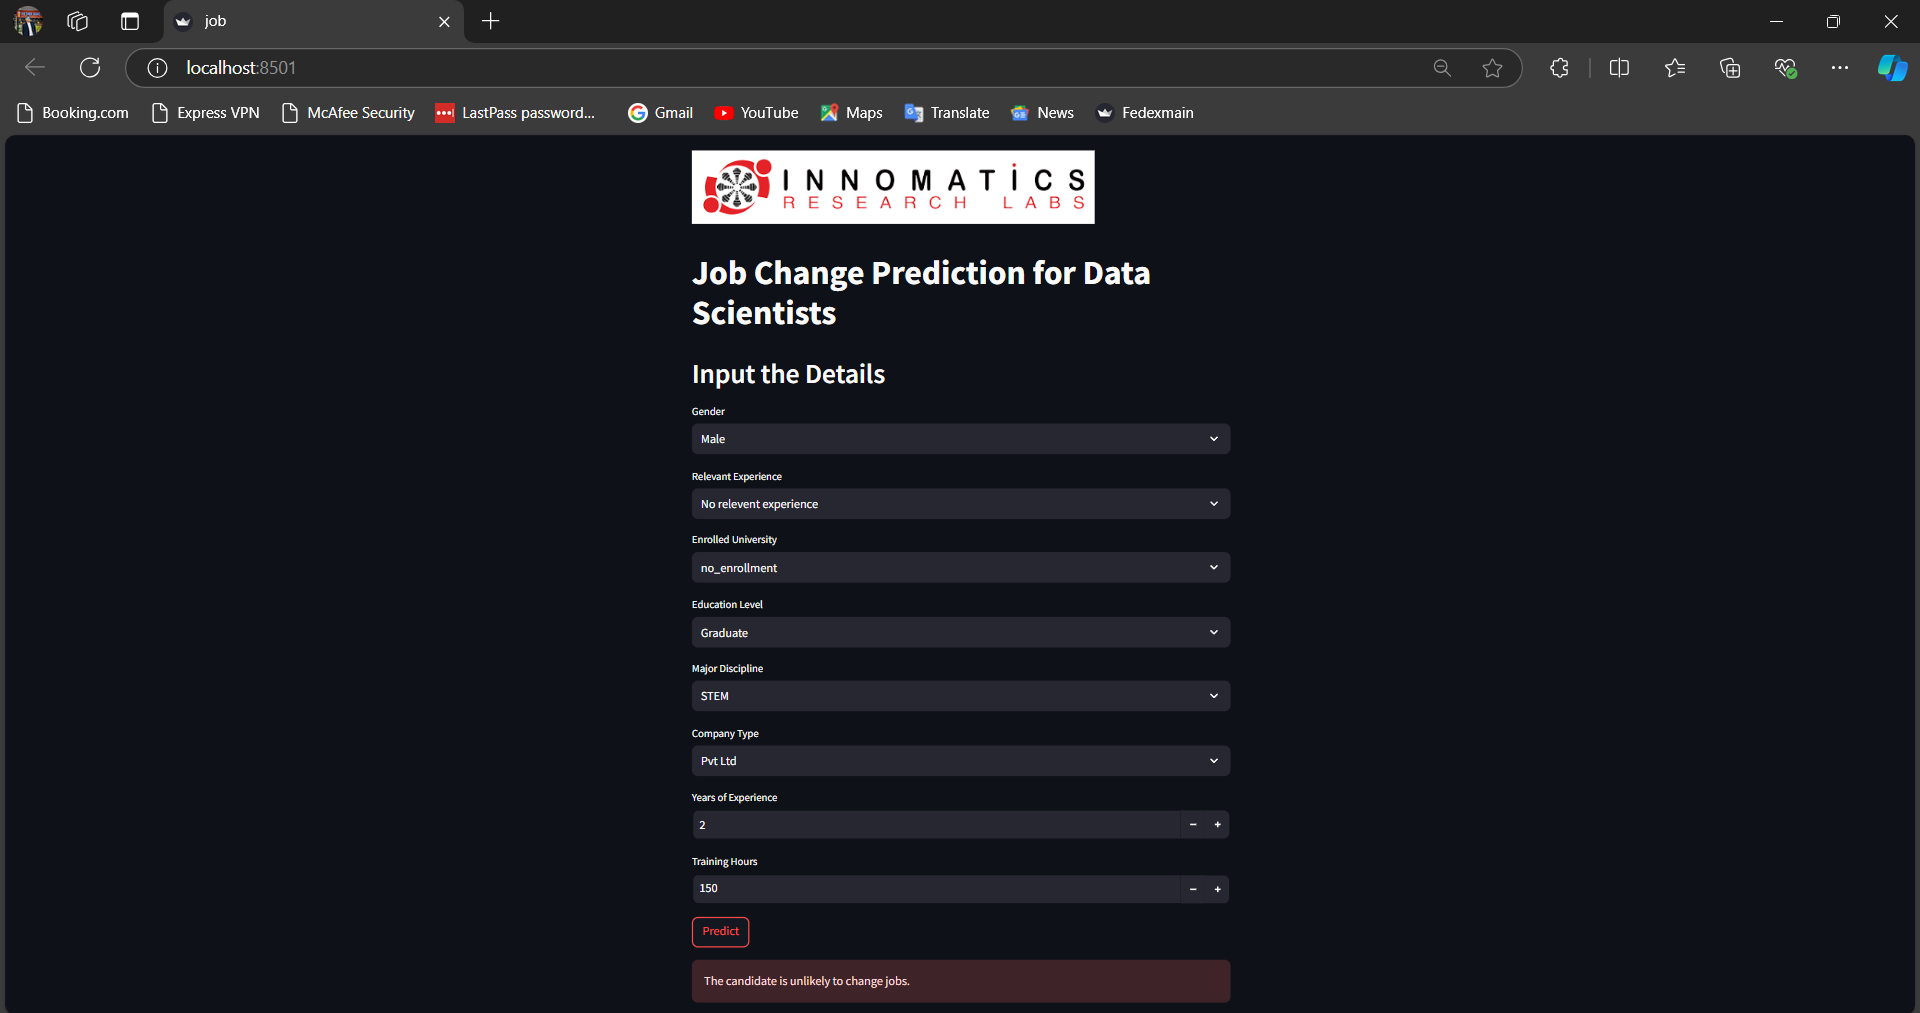